In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# import RMSE,MSE,MAPE lib
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('../BNB-USD.csv')
df.dropna()
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
18/18 [==============================] - 113s 2s/step - loss: 0.0016 - val_loss: 0.0356
Epoch 2/100
18/18 [==============================] - 11s 633ms/step - loss: 4.0866e-04 - val_loss: 0.0171
Epoch 3/100
18/18 [==============================] - 12s 703ms/step - loss: 3.4749e-04 - val_loss: 0.0039
Epoch 4/100
18/18 [==============================] - 12s 666ms/step - loss: 3.3045e-04 - val_loss: 0.0231
Epoch 5/100
18/18 [==============================] - 11s 609ms/step - loss: 3.3717e-04 - val_loss: 0.0037
Epoch 6/100
18/18 [==============================] - 12s 675ms/step - loss: 2.8866e-04 - val_loss: 0.0035
Epoch 7/100
18/18 [==============================] - 11s 629ms/step - loss: 2.7586e-04 - val_loss: 0.0083
Epoch 8/100
18/18 [==============================] - 12s 645ms/step - loss: 2.6566e-04 - val_loss: 0.0095
Epoch 9/100
18/18 [==============================] - 14s 802ms/step - loss: 2.2877e-04 - val_loss: 0.0241
Epoch 10/100
18/18 [==============================] 

18/18 [==============================] - 8s 450ms/step - loss: 8.7532e-05 - val_loss: 0.0526
Epoch 79/100
18/18 [==============================] - 8s 459ms/step - loss: 9.1327e-05 - val_loss: 0.0692
Epoch 80/100
18/18 [==============================] - 8s 456ms/step - loss: 8.5366e-05 - val_loss: 0.0423
Epoch 81/100
18/18 [==============================] - 8s 457ms/step - loss: 7.6325e-05 - val_loss: 0.0442
Epoch 82/100
18/18 [==============================] - 8s 454ms/step - loss: 7.4438e-05 - val_loss: 0.0594
Epoch 83/100
18/18 [==============================] - 8s 466ms/step - loss: 8.7848e-05 - val_loss: 0.0644
Epoch 84/100
18/18 [==============================] - 8s 476ms/step - loss: 8.7916e-05 - val_loss: 0.0487
Epoch 85/100
18/18 [==============================] - 8s 451ms/step - loss: 8.7806e-05 - val_loss: 0.0819
Epoch 86/100
18/18 [==============================] - 8s 456ms/step - loss: 1.1224e-04 - val_loss: 0.0403
Epoch 87/100
18/18 [==============================] - 8s 47

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

10/10 [==============================] - 1s 58ms/step


In [11]:
rmse = mean_squared_error(ytest, y_pred, squared=False)
print("RMSE on test set: {:.3f}".format(rmse))
rmse = mean_squared_error(yval, y_pred_val, squared=False)
print("RMSE on validation set: {:.3f}".format(rmse))
mape = mean_absolute_percentage_error(ytest, y_pred)
print("MAPE on test set: {:.3f}".format(mape))
mape = mean_absolute_percentage_error(yval, y_pred_val)
print("MAPE on validation set: {:.3f}".format(mape))
evs = explained_variance_score(ytest, y_pred, multioutput='uniform_average')
print("The explained variance score (EVS) on test set: {:.3f}".format(evs))
evs = explained_variance_score(yval, y_pred_val)
print("The explained variance score (EVS) on validate set: {:.3f}".format(evs))

RMSE on test set: 0.253
RMSE on validation set: 0.044
MAPE on test set: 0.313
MAPE on validation set: 0.084
The explained variance score (EVS) on test set: 0.078
The explained variance score (EVS) on validate set: 0.470


In [12]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [13]:
rmse = mean_squared_error(ytest, y_pred, squared=False)
print("RMSE on test set: {:.3f}".format(rmse))
rmse = mean_squared_error(yval, y_pred_val, squared=False)
print("RMSE on validation set: {:.3f}".format(rmse))

RMSE on test set: 289.833
RMSE on validation set: 271.941


In [14]:
def calculate_mape(y_true, y_pred, epsilon=1e-8):
 
    # Exclude zero values from y_true and y_pred
    non_zero_indices = np.nonzero(y_true)
    y_true_non_zero = y_true[non_zero_indices]
    y_pred_non_zero = y_pred[non_zero_indices]
    
    # Calculate absolute percentage error
    absolute_percentage_error = np.abs((y_true_non_zero - y_pred_non_zero) / (y_true_non_zero + epsilon))
    
    # Calculate MAPE
    mape = np.mean(absolute_percentage_error) * 100
    
    return mape

In [15]:
mapekq = calculate_mape(ytest, y_pred, epsilon=1e-8)
print("MAPE on test set: {:.3f}".format(mapekq))

MAPE on test set: 46595.635


In [16]:
# 13. Dự báo 30 ngày tiếp theo
x_input = val_data[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while i < 30 and len(temp_input) >= n_steps:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input[-n_steps:])
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1


0 day input [0.42694237 0.42326871 0.40907224 0.40925538 0.41005909 0.42743496
 0.45596829 0.45664851 0.45331725 0.48704139 0.5007178  0.48950874
 0.49759857 0.49158345 0.49512294 0.47521485 0.487006   0.4759144
 0.47637974 0.48559834 0.45898966 0.46241829 0.4632803  0.46732347
 0.46802425 0.46532065 0.46340913 0.4554494  0.45905747 0.46360871
 0.4612228  0.45861938 0.45852332 0.46184223 0.47001046 0.47650613
 0.47086292 0.47975428 0.48602235 0.49230179 0.5142748  0.502072
 0.50681758 0.47643085 0.46928492 0.4748993  0.49020707 0.48816568
 0.48909578 0.49959705 0.48846671 0.48902045 0.47908999 0.47558124
 0.49858837 0.48535539 0.47531123 0.48163036 0.47822508 0.48270933
 0.47652949 0.47480446 0.46347232 0.46131039 0.46437155 0.45416405
 0.45550983 0.45919399 0.46074999 0.462817   0.45962882 0.46363891
 0.45677594 0.45604556 0.45864975 0.45240024 0.45646288 0.4627826
 0.45154891 0.44977025 0.45296331 0.4540097  0.46391558 0.46026242
 0.46008045 0.45293421 0.45009603 0.45376055 0.4527167

7 day output [[0.3861781]]
8 day input [0.45331725 0.48704139 0.5007178  0.48950874 0.49759857 0.49158345
 0.49512294 0.47521485 0.487006   0.4759144  0.47637974 0.48559834
 0.45898966 0.46241829 0.4632803  0.46732347 0.46802425 0.46532065
 0.46340913 0.4554494  0.45905747 0.46360871 0.4612228  0.45861938
 0.45852332 0.46184223 0.47001046 0.47650613 0.47086292 0.47975428
 0.48602235 0.49230179 0.5142748  0.502072   0.50681758 0.47643085
 0.46928492 0.4748993  0.49020707 0.48816568 0.48909578 0.49959705
 0.48846671 0.48902045 0.47908999 0.47558124 0.49858837 0.48535539
 0.47531123 0.48163036 0.47822508 0.48270933 0.47652949 0.47480446
 0.46347232 0.46131039 0.46437155 0.45416405 0.45550983 0.45919399
 0.46074999 0.462817   0.45962882 0.46363891 0.45677594 0.45604556
 0.45864975 0.45240024 0.45646288 0.4627826  0.45154891 0.44977025
 0.45296331 0.4540097  0.46391558 0.46026242 0.46008045 0.45293421
 0.45009603 0.45376055 0.45271679 0.45039792 0.40846874 0.41530129
 0.3825143  0.38660382 

15 day output [[0.38553298]]
16 day input [0.487006   0.4759144  0.47637974 0.48559834 0.45898966 0.46241829
 0.4632803  0.46732347 0.46802425 0.46532065 0.46340913 0.4554494
 0.45905747 0.46360871 0.4612228  0.45861938 0.45852332 0.46184223
 0.47001046 0.47650613 0.47086292 0.47975428 0.48602235 0.49230179
 0.5142748  0.502072   0.50681758 0.47643085 0.46928492 0.4748993
 0.49020707 0.48816568 0.48909578 0.49959705 0.48846671 0.48902045
 0.47908999 0.47558124 0.49858837 0.48535539 0.47531123 0.48163036
 0.47822508 0.48270933 0.47652949 0.47480446 0.46347232 0.46131039
 0.46437155 0.45416405 0.45550983 0.45919399 0.46074999 0.462817
 0.45962882 0.46363891 0.45677594 0.45604556 0.45864975 0.45240024
 0.45646288 0.4627826  0.45154891 0.44977025 0.45296331 0.4540097
 0.46391558 0.46026242 0.46008045 0.45293421 0.45009603 0.45376055
 0.45271679 0.45039792 0.40846874 0.41530129 0.3825143  0.38660382
 0.38447914 0.35239985 0.3469854  0.34047764 0.35952183 0.35015293
 0.38010719 0.39324704 0.

23 day output [[0.3854014]]
24 day input [0.46802425 0.46532065 0.46340913 0.4554494  0.45905747 0.46360871
 0.4612228  0.45861938 0.45852332 0.46184223 0.47001046 0.47650613
 0.47086292 0.47975428 0.48602235 0.49230179 0.5142748  0.502072
 0.50681758 0.47643085 0.46928492 0.4748993  0.49020707 0.48816568
 0.48909578 0.49959705 0.48846671 0.48902045 0.47908999 0.47558124
 0.49858837 0.48535539 0.47531123 0.48163036 0.47822508 0.48270933
 0.47652949 0.47480446 0.46347232 0.46131039 0.46437155 0.45416405
 0.45550983 0.45919399 0.46074999 0.462817   0.45962882 0.46363891
 0.45677594 0.45604556 0.45864975 0.45240024 0.45646288 0.4627826
 0.45154891 0.44977025 0.45296331 0.4540097  0.46391558 0.46026242
 0.46008045 0.45293421 0.45009603 0.45376055 0.45271679 0.45039792
 0.40846874 0.41530129 0.3825143  0.38660382 0.38447914 0.35239985
 0.3469854  0.34047764 0.35952183 0.35015293 0.38010719 0.39324704
 0.40258166 0.40496299 0.40174028 0.39579538 0.39000642 0.38617811
 0.38473803 0.38509089 0

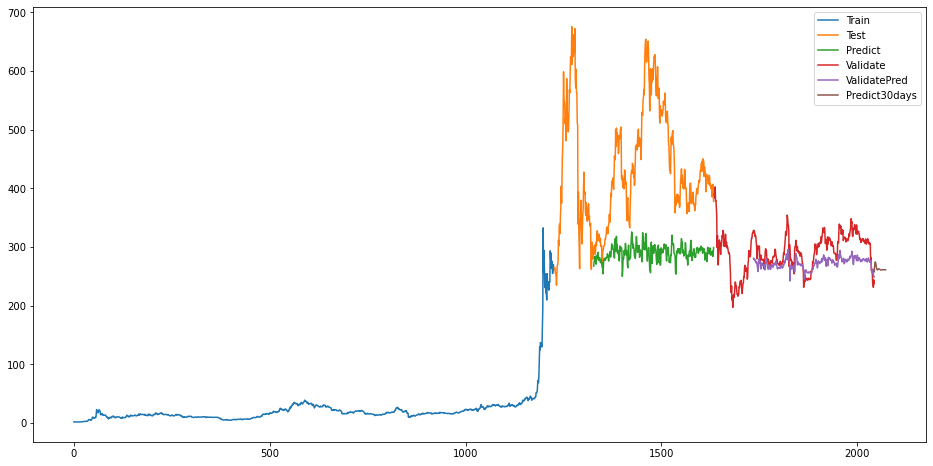

In [17]:
# 14.Vẽ hình
plt.subplots(figsize=(16, 8))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()